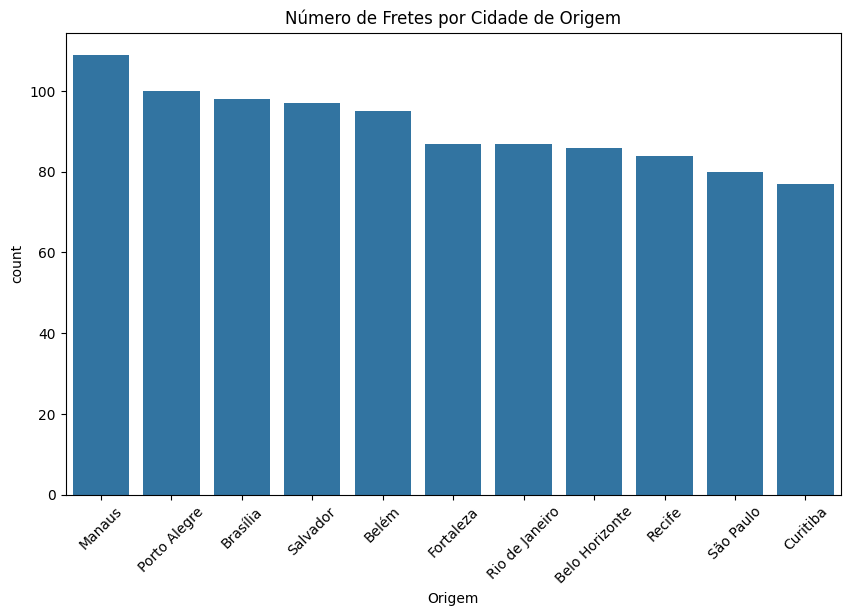

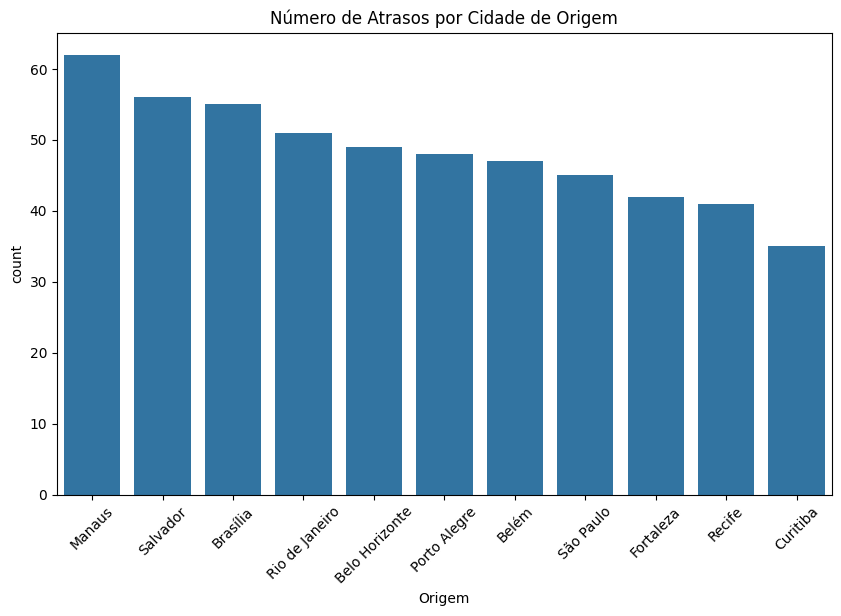

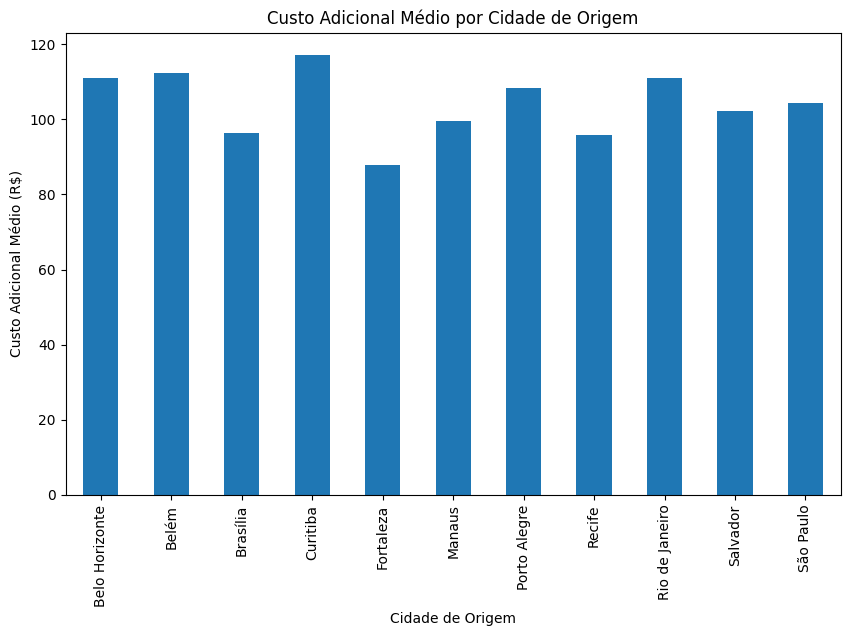

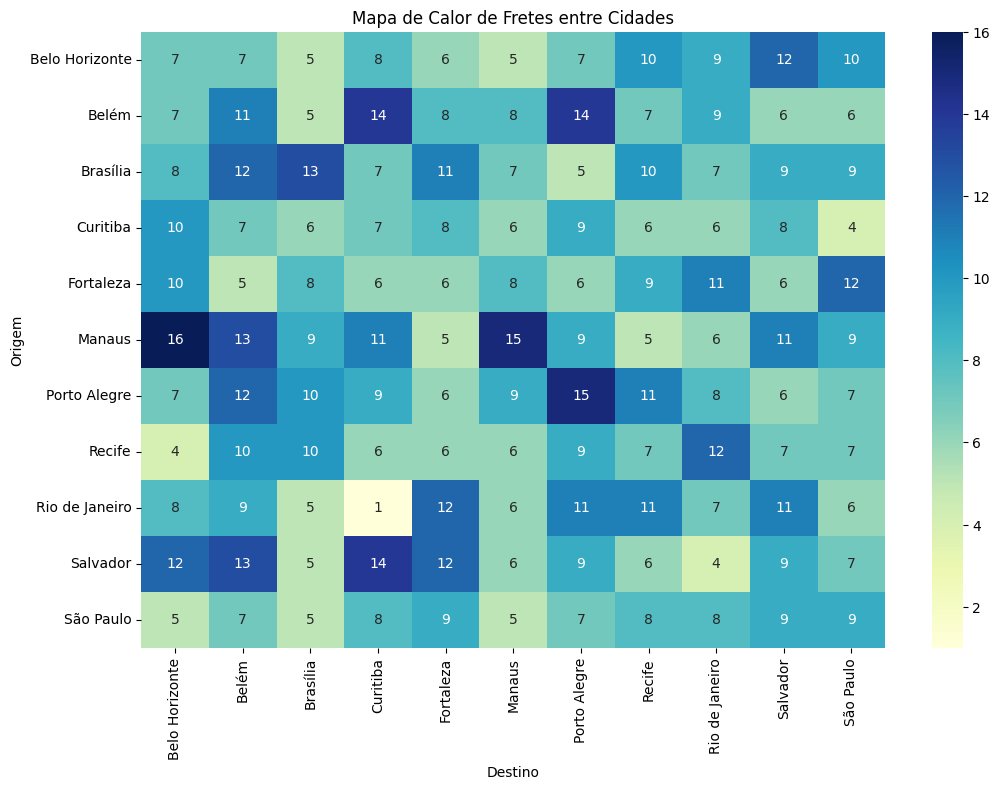

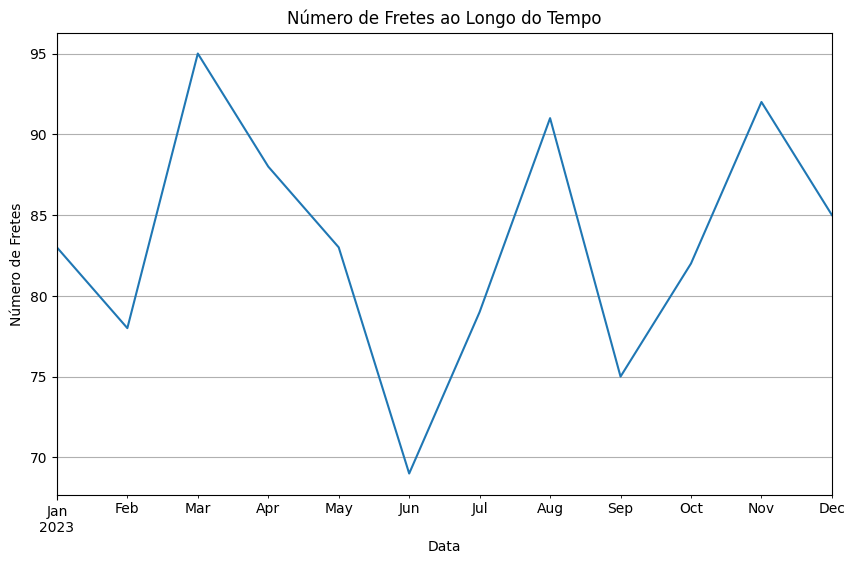

Cidades com mais atrasos:
Origem
Manaus            62
Salvador          56
Brasília          55
Rio de Janeiro    51
Belo Horizonte    49
Name: count, dtype: int64
Tipos de carga com maiores custos adicionais:
Tipo de Carga
Roupas               113.688312
Produtos Químicos    105.418182
Alimentos            102.013514
Eletrônicos          101.958084
Livros               101.407609
Name: Custo Adicional (R$), dtype: float64
Períodos de maior demanda para fretes:
Data de Contratação
2023-03-01    95
2023-11-01    92
2023-08-01    91
2023-04-01    88
2023-12-01    85
dtype: int64


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados
df = pd.read_csv('amostra_fretes.csv')

# Exibir as primeiras linhas do DataFrame
df.head()

# Análise 1: Número de fretes por cidade de origem
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Origem', order=df['Origem'].value_counts().index)
plt.title('Número de Fretes por Cidade de Origem')
plt.xticks(rotation=45)
plt.show()

# Análise 2: Número de atrasos por cidade de origem
atrasos = df[df['Status da Entrega'] == 'Atraso']
plt.figure(figsize=(10, 6))
sns.countplot(data=atrasos, x='Origem', order=atrasos['Origem'].value_counts().index)
plt.title('Número de Atrasos por Cidade de Origem')
plt.xticks(rotation=45)
plt.show()

# Análise 3: Custo adicional médio por cidade de origem
custo_adicional_por_cidade = df.groupby('Origem')['Custo Adicional (R$)'].mean()
plt.figure(figsize=(10, 6))
custo_adicional_por_cidade.plot(kind='bar')
plt.title('Custo Adicional Médio por Cidade de Origem')
plt.ylabel('Custo Adicional Médio (R$)')
plt.xlabel('Cidade de Origem')
plt.show()

# Análise 4: Mapa de calor de fretes entre cidades
pivot_table = df.pivot_table(index='Origem', columns='Destino', values='Valor do Frete (R$)', aggfunc='count', fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Mapa de Calor de Fretes entre Cidades')
plt.show()

# Análise 5: Número de fretes ao longo do tempo
df['Data de Contratação'] = pd.to_datetime(df['Data de Contratação'])
fretes_por_data = df.groupby(df['Data de Contratação'].dt.to_period('M')).size()
fretes_por_data.index = fretes_por_data.index.to_timestamp()

plt.figure(figsize=(10, 6))
fretes_por_data.plot()
plt.title('Número de Fretes ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Número de Fretes')
plt.grid(True)
plt.show()

# Perguntas de Negócios
# 1. Quais são as cidades com mais atrasos e como podemos melhorar as operações nessas cidades?
# 2. Quais tipos de carga têm os maiores custos adicionais e como podemos reduzir esses custos?
# 3. Quais são os períodos de maior demanda para fretes e como podemos nos preparar melhor para esses períodos?

# Responder a algumas perguntas de negócios
print("Cidades com mais atrasos:")
print(atrasos['Origem'].value_counts().head())

print("Tipos de carga com maiores custos adicionais:")
print(df.groupby('Tipo de Carga')['Custo Adicional (R$)'].mean().sort_values(ascending=False).head())

print("Períodos de maior demanda para fretes:")
print(fretes_por_data.sort_values(ascending=False).head())
